# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

**Base de dados escolhida**

<p style='text-align: justify;'>A base escolhida trata da Diabetes, doença comum cuja a prevenção tem como um dos maiores empecilhos a condição social das pessoas.  Além disso, seria interessante predizer quais pacientes têm chances de serem readmitidos de forma a poder tomar medidas preventivas que auxiliem no controle da doença e diminuição das taxas de readmissão.</p>

- **`Nome da base`**: Diabetes 130-US hospitals for years 1999-2008 Data Set

- **`Link drive`**: https://drive.google.com/open?id=10rtGtHs9OmtzqDFsBK5kFC7fOP7IxA1e

- **`Repositório`**: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008


<p style='text-align: justify;'>A base <strong>Diabetes 130-US hospitals</strong> traz dados de 10 anos de atendimento (1999-2008) clínico de pacientes em 130 hospitais e redes de distribuição integradas nos EUA. Ela inclui 50 atributos e 101.766 instâncias que representam os resultados dos pacientes e dos hospitais. O estudo está descrito no artigo: <strong>Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records_</strong> que pode ser encontrado <a href="https://www.hindawi.com/journals/bmri/2014/781670/">[aqui]</a>.</p>

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

Ex: Hipoteses válidas seriam:
- As pessoas fazem mais compras nos dias utéis ou finais de semana?
- Existe diferença entre o padrão de compra de segunda ou terça feira?
- O horário de pico influencia no padrão de compra dos clientes?
- Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
- Qual o efeito de uma campanha de marketing nas vendas?


#### Hipóteses

- **`Hipótese 1`**: A etnia e idade são fatores importantes na readmissão de um paciente?

- **`Hipótese 2`**: A realização do teste HbA1c está associada a uma redução nas taxas de readmissão?

- **`Hipótese 3`**: Quem tem diabetes como primeiro diagnóstico tem menos chances de ser readmitido? 

### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

### Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

%run modules/data.py

print(f'Versão Pandas: {pd.__version__}')
print(f'Versão Numpy: {np.__version__}')

Versão Pandas: 1.0.5
Versão Numpy: 1.17.4


### Bibliotecas de visualização

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use(['ggplot'])

print(f'Versão Seaborn: {sns.__version__}')
print(f'Versão Matplotlib: {matplotlib.__version__}')

Versão Seaborn: 0.10.1
Versão Matplotlib: 3.2.1


### Dicionário dos dados

<p style='text-align: justify;'> <strong>encounter_id (numérico)</strong>: identificador único de um encontro.</p>

<p style='text-align: justify;'> <strong>patient_nbr (numérico)</strong>: identificador único de um paciente.</p>

<p style='text-align: justify;'> <strong>race (nominal)</strong>: raça do paciente.</p>

<p style='text-align: justify;'> <strong>gender (nominal)</strong>: gênero do paciente.</p>

<p style='text-align: justify;'> <strong>age (nominal)</strong>: idade do paciente agrupada em intervalos de 10 anos.</p>

<p style='text-align: justify;'> <strong>weight (nominal)</strong>: peso do paciente (agrupado) em libras.</p>

<p style='text-align: justify;'> <strong>admission_type_id (numérico)</strong>: tipo de admissão.</p>

<p style='text-align: justify;'> <strong>discharge_disposition_id (numérico)</strong>: código de status da alta hospitalar.</p>

<p style='text-align: justify;'> <strong>admission_source_id (numérico)</strong>: fonte de admissão do paciente.</p>

<p style='text-align: justify;'> <strong>time_in_hospital (numérico)</strong>: tempo do paciente no hospital.</p>

<p style='text-align: justify;'> <strong>payer_code (nominal)</strong>: código do pagador.</p>

<p style='text-align: justify;'> <strong>medical_specialty (nominal)</strong>: especialidade médica do médico admitidor.</p>

<p style='text-align: justify;'> <strong>num_lab_procedures (numérico)</strong>: número de testes de laboratório realizados durante o encontro.</p>

<p style='text-align: justify;'> <strong>num_procedures (numérico)</strong>: número de procedimentos (exceto testes de laboratório) realizados durante o encontro.</p>

<p style='text-align: justify;'> <strong>num_medications (numérico)</strong>: número de nomes genéricos distintos administrados durante o encontro.</p>

<p style='text-align: justify;'> <strong>number_outpatient (numérico)</strong>: número de consultas ambulatoriais do paciente no ano anterior ao encontro.</p>

<p style='text-align: justify;'> <strong>number_emergency (numérico)</strong>: número de visitas de emergência do paciente no ano anterior ao encontro.</p>

<p style='text-align: justify;'> <strong>number_inpatient (numérico)</strong>: número de internação do paciente no ano anterior ao encontro.</p>

<p style='text-align: justify;'> <strong>diag_1 (nominal)</strong>: diagnóstico primário (codificado como três primeiros dígitos da ICD9).</p>

<p style='text-align: justify;'> <strong>diag_2 (nominal)</strong>: diagnóstico secundário (codificado como três primeiros dígitos da ICD9).</p>

<p style='text-align: justify;'> <strong>diag_3 (nominal)</strong>: diagnóstico adicional.</p>

<p style='text-align: justify;'> <strong>number_diagnoses (numérico)</strong>: número de diagnósticos inseridos no sistema.</p>

<p style='text-align: justify;'> <strong>max_glu_serum (nominal)</strong>: Teste de glicose (diagnostica e monitora o diabetes). Indica o intervalo do resultado ou se o teste não foi realizado.</p>

<p style='text-align: justify;'> <strong>A1Cresult (nominal)</strong>: Teste de hemoglobina glicada (avalia o controle glicêmico e confirma o diagnóstico de diabetes ou de pré-diabetes). Indica o intervalo do resultado ou se o teste não foi realizado.</p>

<p style='text-align: justify;'> <strong>23 features for medications (nominal)</strong>: para os nomes genéricos. O recurso indica se o medicamento foi prescrito ou se houve uma alteração na dosagem.</p>

<p style='text-align: justify;'> <strong>readmitted (nominal)</strong>: dias para readmissão hospitalar.</p>

<p style='text-align: justify;'> <strong>change (nominal)</strong>: indica se houve uma alteração nos medicamentos para diabéticos.</p>

<p style='text-align: justify;'> <strong>diabetesMed (nominal)</strong>: indica se houve algum medicamento diabético prescrito.</p>

### Carregamento e cópia dos dados

In [3]:
data_orig = pd.read_csv('dataset_diabetes/diabetic_data.csv')
data = data_orig.copy()

### Características dos dados

In [4]:
data.replace('?', np.nan, inplace=True)
data.replace('Unknown/Invalid', np.nan, inplace=True)
data.head(5).T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,NaN,NaN,NaN,NaN,NaN
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [5]:
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 101766 | Colunas: 50


In [6]:
print(f'Colunas presentes: {data.columns.values}')

Colunas presentes: ['encounter_id' 'patient_nbr' 'race' 'gender' 'age' 'weight'
 'admission_type_id' 'discharge_disposition_id' 'admission_source_id'
 'time_in_hospital' 'payer_code' 'medical_specialty' 'num_lab_procedures'
 'num_procedures' 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'diag_1' 'diag_2' 'diag_3' 'number_diagnoses'
 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide'
 'chlorpropamide' 'glimepiride' 'acetohexamide' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'insulin'
 'glyburide-metformin' 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted']


In [7]:
print(f'Tipos dos dados: {data.dtypes.unique()}')

Tipos dos dados: [dtype('int64') dtype('O')]


### Estatística dos dados

In [8]:
data.drop(['encounter_id', 
           'patient_nbr', 
           'admission_type_id', 
           'discharge_disposition_id', 
           'admission_source_id'], axis=1).describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
data[['race', 
      'gender', 
      'age', 
      'weight', 
      'change', 
      'diabetesMed', 
      'readmitted', 
      'diag_1', 
      'diag_2', 
      'diag_3']].describe(include='O')

,race,gender,age,weight,change,diabetesMed,readmitted,diag_1,diag_2,diag_3
count,99493,101763,101766,3197,101766,101766,101766,101745,101408,100343
unique,5,2,10,9,2,2,3,716,748,789
top,Caucasian,Female,[70-80),[75-100),No,Yes,NO,428,276,250
freq,76099,54708,26068,1336,54755,78363,54864,6862,6752,11555


### Tratando valores nulos

In [10]:
import missingno as msno

In [11]:
data_missing = pd.DataFrame({'nomes': data.columns, 
                             'tipos': data.dtypes, 
                             'NA #': data.isna().sum(),
                             'NA %': (data.isna().sum() / data.shape[0]) * 100
                            })

data_missing[data_missing['NA #'] > 0].set_index('nomes')

,tipos,NA #,NA %
nomes,,,
race,object,2273,2.233555
gender,object,3,0.002948
weight,object,98569,96.858479
payer_code,object,40256,39.557416
medical_specialty,object,49949,49.082208
diag_1,object,21,0.020636
diag_2,object,358,0.351787
diag_3,object,1423,1.398306


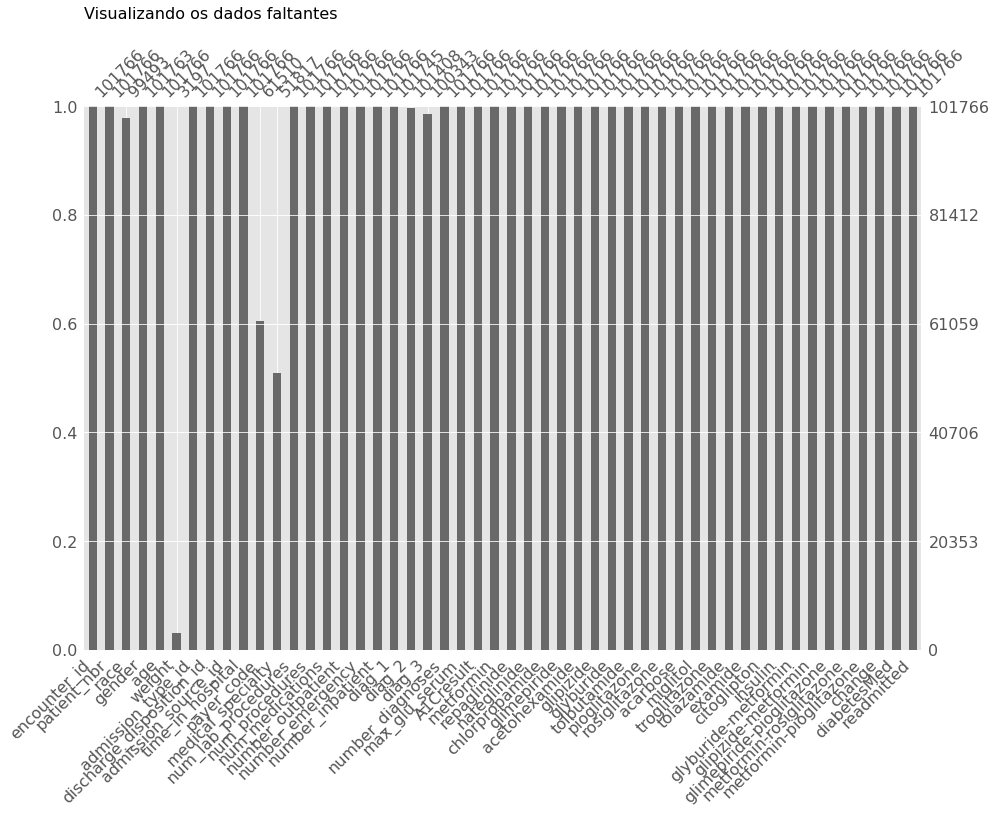

In [12]:
msno.bar(data, figsize=[15, 10])
plt.title('Visualizando os dados faltantes', y=1.15, size=16, loc='left')
plt.show()

#### Correlação de nulidade

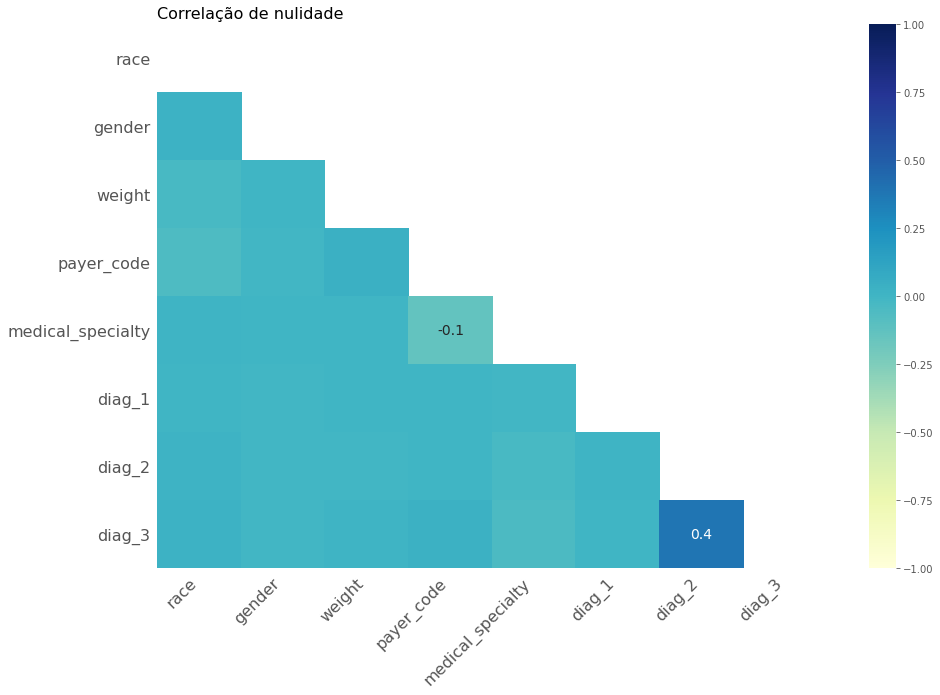

In [13]:
msno.heatmap(data, figsize=[15, 10], cmap='YlGnBu')
plt.title('Correlação de nulidade', y=1.15, size=16, loc='left')
plt.show()

#### Drop nas colunas com valores altos de nulos

In [14]:
data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

#### Substituição pela moda nas demais colunas

In [15]:
cols= ['race', 'diag_1', 'diag_2', 'diag_3', 'gender']
for c in cols:
    data[c].fillna(data[c].mode()[0], inplace=True)

### Localizando outliers

In [16]:
from sklearn.neighbors import LocalOutlierFactor

X = data.drop(['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1)

clf_outliers= LocalOutlierFactor(n_neighbors=20, contamination=.03)
data['is_outlier']= clf_outliers.fit_predict(X[[c for c in X.columns if X[c].dtypes != 'O']])

data.drop(data.query('is_outlier == -1').index, inplace=True)
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 98713 | Colunas: 48


### Pré-processamento dos dados

In [17]:
data.dropna(inplace=True)

#### Mapeamento das colunas

In [18]:
data['race'] = data['race'].map({'Caucasian': 0, 
                                 'AfricanAmerican': 1, 
                                 'Hispanic': 2, 
                                 'Other': 3, 
                                 'Asian': 4}).astype(int)

In [19]:
data['change'] = data['change'].map({'No': 0, 'Ch': 1}).astype(bool)
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1}).astype(bool)
data['diabetesMed'] = data['diabetesMed'].map({'No': 0, 'Yes': 1}).astype(bool)

In [20]:
cols = [
        'metformin', 
        'repaglinide', 
        'nateglinide', 
        'chlorpropamide', 
        'glimepiride', 
        'acetohexamide', 
        'glipizide', 
        'glyburide', 
        'tolbutamide', 
        'pioglitazone', 
        'rosiglitazone', 
        'acarbose', 
        'miglitol', 
        'troglitazone', 
        'tolazamide', 
        'insulin',
        'glyburide-metformin', 
        'glipizide-metformin', 
        'metformin-rosiglitazone', 
        'metformin-pioglitazone'
]

for c in cols:
    data[c] = data[c].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}).astype(int)

In [21]:
data['A1Cresult'] = data['A1Cresult'].map({'None': 0, '>8': 1, 'Norm': 2, '>7': 3}).astype(int)
data['max_glu_serum'] = data['max_glu_serum'].map({'None': 0, 'Norm': 1, '>200': 2, '>300': 3}).astype(int)

#### Removendo medicamentos que não foram receitados para nenhum paciente, uma vez que não fornecem informações significativas.

In [22]:
data.drop(['examide', 'citoglipton', 'glimepiride-pioglitazone'], axis=1, inplace=True)

### Remoção de registros do mesmo paciente

In [23]:
data.drop_duplicates(subset='patient_nbr', keep='first', inplace=True)
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 70492 | Colunas: 45


### Remoção dos pacientes que faleceram ou que estão internados
Essas amostras serão removidas, uma vez que esses pacientes não podem ser readmitidos.

In [24]:
data=data[~data['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 68968 | Colunas: 45


### Remoção dos Ids do conjunto de dados

In [25]:
data.drop(['encounter_id', 
           'patient_nbr', 
           'admission_type_id', 
           'discharge_disposition_id', 
           'admission_source_id',
           'is_outlier'], inplace=True, axis=1)

data.reset_index(drop=True, inplace=True)

### Engenharia de recursos

#### Quantidade de utilização do serviços hospitalares

In [26]:
data['use_hospital_services'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

#### Número de alterações do medicamento

In [27]:
cols = [
        'metformin', 
        'repaglinide', 
        'nateglinide', 
        'chlorpropamide', 
        'glimepiride', 
        'acetohexamide', 
        'glipizide', 
        'glyburide', 
        'tolbutamide', 
        'pioglitazone', 
        'rosiglitazone', 
        'acarbose', 
        'miglitol', 
        'troglitazone', 
        'tolazamide', 
        'insulin',
        'glyburide-metformin', 
        'glipizide-metformin', 
        'metformin-rosiglitazone', 
        'metformin-pioglitazone'
]

for c in cols:
    name_cols = str(c)+'_is_change'
    data[name_cols] = data[c].apply(lambda x : 0 if(x==0 or x==1) else 1)

In [28]:
data['total_changes'] = 0

for c in cols:
    name_cols = str(c)+'_is_change'
    data['total_changes'] = data['total_changes'] + data[name_cols]
    del data[name_cols]

#### Covertendo a idade para um ponto médio da categoria de idades usando mediana

In [29]:
age = {
    '[0-10)':  int(np.median(np.arange(0, 11, 1))),
    '[10-20)': int(np.median(np.arange(10, 21, 1))), 
    '[20-30)': int(np.median(np.arange(20, 31, 1))),
    '[30-40)': int(np.median(np.arange(30, 41, 1))),
    '[40-50)': int(np.median(np.arange(40, 51, 1))),
    '[50-60)': int(np.median(np.arange(50, 61, 1))),
    '[60-70)': int(np.median(np.arange(60, 71, 1))),
    '[70-80)': int(np.median(np.arange(70, 81, 1))),
    '[80-90)': int(np.median(np.arange(80, 91, 1))),
    '[90-100)':int(np.median(np.arange(90, 101, 1)))
}

data['median_ages'] = data['age'].map(age)

#### Categorização dos diagnósticos

- **`Fonte:`** Artigo: Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records

#### 1: Circulatory | 2: Respiratory | 3: Digestive | 4: Diabetes | 5: Injury | 6: Musculoskeletal | 7: Genitourinary | 8: Neoplasms | 9: Other

In [30]:
data['categories_diag_1'] = data['diag_1']
data['categories_diag_2'] = data['diag_2']
data['categories_diag_3'] = data['diag_3']

In [31]:
data.loc[data['diag_1'].str.contains('V'), ['categories_diag_1']] = 0
data.loc[data['diag_2'].str.contains('V'), ['categories_diag_2']] = 0
data.loc[data['diag_3'].str.contains('V'), ['categories_diag_3']] = 0

data.loc[data['diag_1'].str.contains('E'), ['categories_diag_1']] = -1
data.loc[data['diag_2'].str.contains('E'), ['categories_diag_2']] = -1
data.loc[data['diag_3'].str.contains('E'), ['categories_diag_3']] = -1

In [32]:
data['categories_diag_1'] = data['categories_diag_1'].astype(float)
data['categories_diag_2'] = data['categories_diag_2'].astype(float)
data['categories_diag_3'] = data['categories_diag_3'].astype(float)

In [ ]:
convertDiagnosis(data, 'categories_diag_1')
data['categories_diag_1'] = data['categories_diag_1'].astype(int)

In [ ]:
convertDiagnosis(data, 'categories_diag_2')
data['categories_diag_2'] = data['categories_diag_2'].astype(int)

In [ ]:
convertDiagnosis(data, 'categories_diag_3')
data['categories_diag_3'] = data['categories_diag_3'].astype(int)

### Salvando o conjunto de dados pré-processado

In [ ]:
data.to_csv('data_cleaned.csv', index=False)

### Antes

In [33]:
print(f'Linhas: {data_orig.shape[0]} | Colunas: {data_orig.shape[1]}\n')
data_orig.head(5).T

Linhas: 101766 | Colunas: 50



,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


### Depois

In [34]:
data_cleaned = pd.read_csv('data_cleaned.csv')
print(f'Linhas: {data_cleaned.shape[0]} | Colunas: {data_cleaned.shape[1]}\n')
data_cleaned.head(5).T

Linhas: 68968 | Colunas: 45



,0,1,2,3,4
race,0,0,1,0,0
gender,0,0,0,1,1
age,[0-10),[10-20),[20-30),[30-40),[40-50)
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8
number_outpatient,0,0,2,0,0
number_emergency,0,0,0,0,0
number_inpatient,0,0,1,0,0


### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2. Ao investigar a hipótese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

### Gráfico 1: Distribuição da variável readmitted

In [35]:
plt.rcParams['axes.facecolor']='white'
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

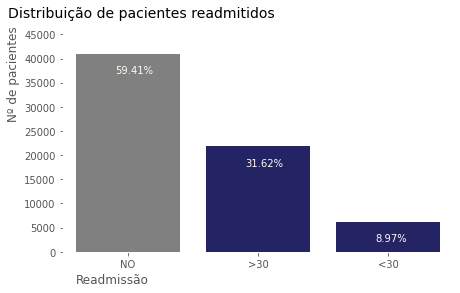

In [36]:
plt.rcParams['figure.figsize'] = [7, 4]

sns.countplot(data_cleaned['readmitted'], palette=['#808080', '#191970', '#191970'])

plt.title('Distribuição de pacientes readmitidos', y=1.05, size=14, loc='left', x=-0.14)
plt.ylabel('Nº de pacientes', horizontalalignment='left', y=0.60)
plt.xlabel('Readmissão', horizontalalignment='right', x=0.22)

for i, v in enumerate(data_cleaned['readmitted'].value_counts()):
    plt.text(i-0.1, v-4500, str(round((v/data_cleaned.shape[0])*100, 2))+'%', va='bottom', color='#FFFAF0')
    
plt.ylim(0, 45000)
plt.show()

Percebe-se que a base de dados está desequilibrada. Nossa taxa geral de **readmissão** está em **40,59%**.

### Gráfico 2:  Tempo no hospital vs. readmissão

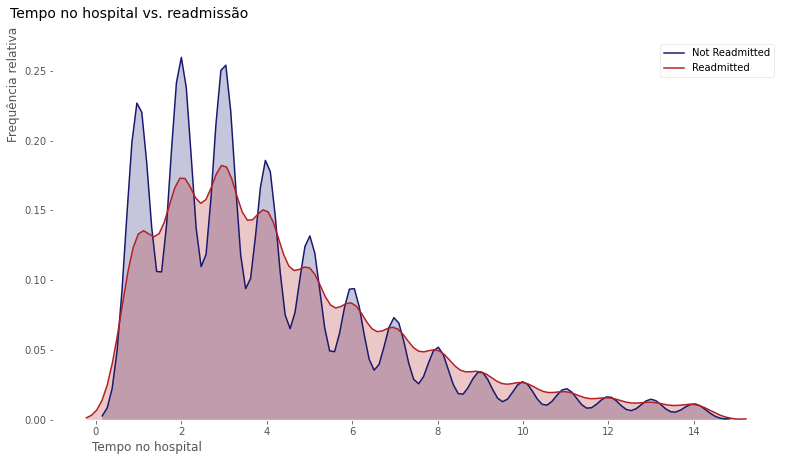

In [37]:
plt.rcParams['figure.figsize'] = [13, 7]

ax=sns.kdeplot(data_cleaned.loc[(data_cleaned['readmitted'] == 'NO'),'time_in_hospital'], 
               color='#191970', 
               shade=True, 
               label='Not Readmitted')

ax=sns.kdeplot(data_cleaned.loc[(data_cleaned['readmitted'] != 'NO'),'time_in_hospital'], 
               color='#B22222', 
               shade=True, 
               label='Readmitted')

plt.title('Tempo no hospital vs. readmissão', y=1.04, size=14, loc='left', x=-0.06)
plt.ylabel('Frequência relativa', horizontalalignment='left', y=0.73)
plt.xlabel('Tempo no hospital', horizontalalignment='right', x=0.205)
plt.show()

A medida que o tempo no hospital aumenta, a distribuição de readmitidos e não readmitidos se torna mais próxima.

### Gráficos 3:  Análise dos pacientes readmitidos após o primeiro encontro

In [38]:
data_cleaned['is_readmitted'] = data_cleaned['readmitted'].map({'NO': 'Não', '>30': 'Sim', '<30': 'Sim'})
just_readmitted = data_cleaned.loc[(data_cleaned['is_readmitted'] == 'Sim')]

#### Gáfico 3.1:  Média das idades vs. readmitidos

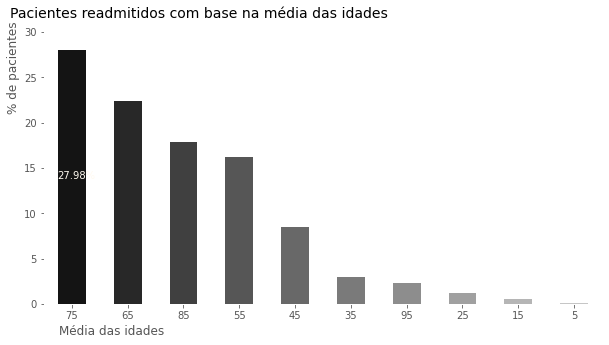

In [39]:
plt.rcParams['figure.figsize'] = [10, 5]

(just_readmitted['median_ages'].value_counts(normalize=True)*100).plot.bar(rot=0, color=sns.color_palette('Greys_r', n_colors=14))

plt.title('Pacientes readmitidos com base na média das idades', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('% de pacientes', horizontalalignment='left', y=0.70)
plt.xlabel('Média das idades', horizontalalignment='right', x=0.215)
plt.ylim(0, 30)

plt.annotate(str(round(just_readmitted['median_ages'].value_counts(normalize=True)[75]*100, 2))+'%',
             (-0.1, 10),
             textcoords='offset points',
             xytext=(-9, 35),            
             color='#FFFAF0')
plt.show()

De acordo com a base de dados aqueles que se encontram na **média dos 75 anos** (70-80) são os que mais possuem casos de readmissão registrados.

#### Gráfico 3.2:  Etnia do paciente vs. readmitidos

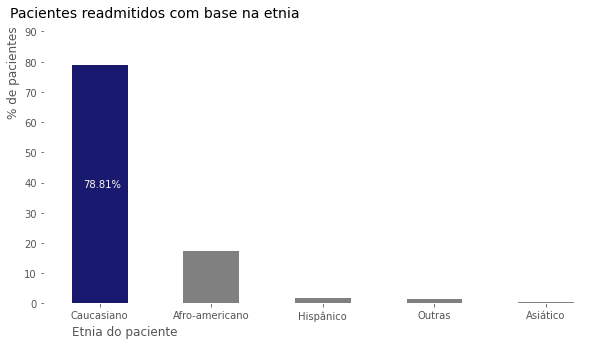

In [40]:
labels = ['Caucasiano', 'Afro-americano', 'Hispânico', 'Outras', 'Asiático']
ticks = [0, 1, 2, 3, 4]
colors=['#191970', '#808080', '#808080', '#808080', '#808080']

plt.rcParams['figure.figsize'] = [10, 5]

(just_readmitted['race'].value_counts(normalize=True)*100).plot.bar(rot=0, color=colors)

plt.title('Pacientes readmitidos com base na etnia', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('% de pacientes', horizontalalignment='left', y=0.68)
plt.xlabel('Etnia do paciente', horizontalalignment='right', x=0.24)
plt.xticks(ticks, labels)
plt.ylim(0, 90)

plt.annotate(str(round(just_readmitted['race'].value_counts(normalize=True)[0]*100, 2))+'%',
             (-0.1, 35),
             textcoords='offset points',
             xytext=(-5, 10),            
             color='#FFFAF0')
plt.show()

Observamos uma maior incidência nas readmissões para pacientes caucasianos. Talvez isso se dê pelo fato de **78,81%** dos registros da base serem de pacientes com essa etnia ou por estes representarem em torno de 79,8% da população americana.

#### Gráfico 3.3: Gênero vs. readmitidos

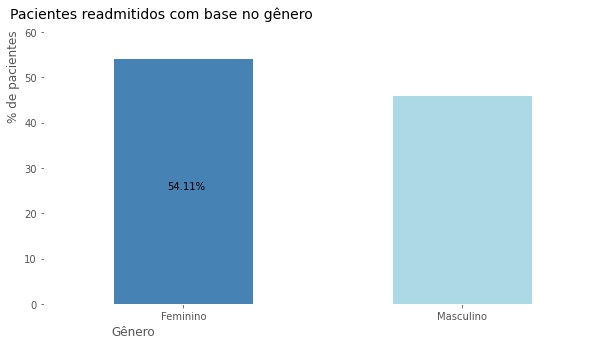

In [41]:
labels = ['Feminino', 'Masculino']
ticks = [0, 1]

plt.rcParams['figure.figsize'] = [10, 5]

(just_readmitted['gender'].value_counts(normalize=True)*100).plot.bar(rot=0, color=['#4682B4', '#ADD8E6'])

plt.title('Pacientes readmitidos com base no gênero', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('% de pacientes', horizontalalignment='left', y=0.67)
plt.xlabel('Gênero', horizontalalignment='right', x=0.20)
plt.xticks(ticks, labels)
plt.ylim(0, 60)

plt.annotate(str(round(just_readmitted['gender'].value_counts(normalize=True)[0]*100, 2))+'%',
             (-0.1, 23),
             textcoords='offset points',
             xytext=(12, 10),            
             color='#000000')
plt.show()

Temos um resultado mais equilibrado nessa análise. Pessoas do gênero feminino possuem mais registros de redmissões, com uma diferença de **8,22%** a mais que homens.

#### Gráfico 3.4: Teste de glicose vs. readmitidos

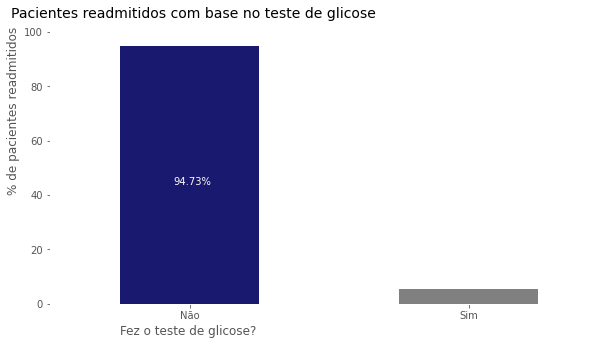

In [42]:
just_readmitted['is_max_glu_serum'] = just_readmitted['max_glu_serum'].map({0: 'Não', 1: 'Sim', 2: 'Sim', 3: 'Sim'})

plt.rcParams['figure.figsize'] = [10, 5]

(just_readmitted['is_max_glu_serum'].value_counts(normalize=True)*100).plot.bar(rot=0, color=['#191970','#808080'])

plt.title('Pacientes readmitidos com base no teste de glicose', y=1.03, size=14, loc='left', x=-0.07)
plt.ylabel('% de pacientes readmitidos', horizontalalignment='left', y=0.40)
plt.xlabel('Fez o teste de glicose?', horizontalalignment='right', x=0.37)
plt.ylim(0, 100)

plt.annotate(str(round(just_readmitted['is_max_glu_serum'].value_counts(normalize=True)[0]*100, 2))+'%',
             (-0.1, 40),
             textcoords='offset points',
             xytext=(12, 10),            
             color='#FFFAF0')
plt.show()

O gráfico acima nos mostra que **94,73%** dos pacientes readmitos não realizaram ou não possuem registros do teste de glicose no primeiro encontro.

#### Gráfico 3.5: Teste HbA1c vs. readmitidos

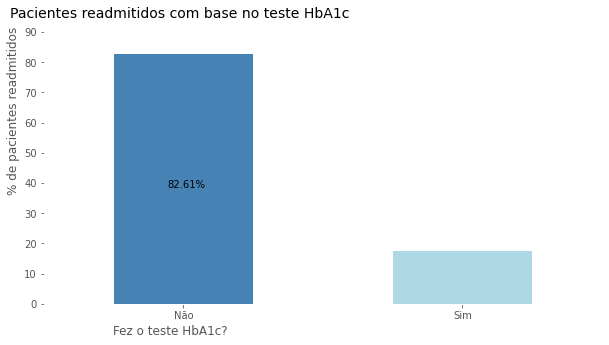

In [43]:
just_readmitted['is_A1Cresult'] = just_readmitted['A1Cresult'].map({0: 'Não', 1: 'Sim', 2: 'Sim', 3: 'Sim'})

plt.rcParams['figure.figsize'] = [10, 5]

(just_readmitted['is_A1Cresult'].value_counts(normalize=True)*100).plot.bar(rot=0, color=['#4682B4', '#ADD8E6'])

plt.title('Pacientes readmitidos com base no teste HbA1c', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('% de pacientes readmitidos', horizontalalignment='left', y=0.40)
plt.xlabel('Fez o teste HbA1c?', horizontalalignment='right', x=0.33)
plt.ylim(0, 90)

plt.annotate(str(round(just_readmitted['is_A1Cresult'].value_counts(normalize=True)[0]*100, 2))+'%',
             (-0.1, 35),
             textcoords='offset points',
             xytext=(12, 10),            
             color='#000000')
plt.show()

Avaliando os pacientes que tiveram registros de readmissão, percebe-se que  **82,61%** não fizeram o teste.

#### Gráficos 3.6: Comparação entre os diagnósticos vs. readmitidos

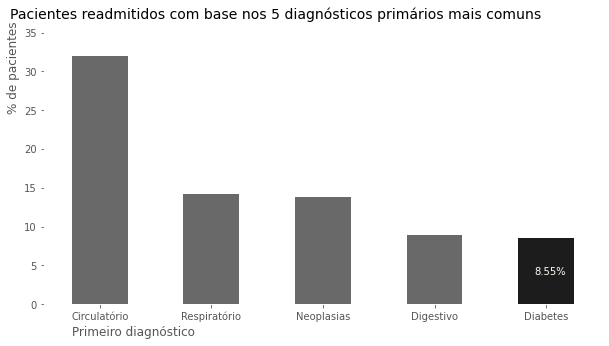

In [44]:
labels = ['Circulatório', 'Respiratório', 'Neoplasias', 'Digestivo', 'Diabetes']
ticks = [0, 1, 2, 3, 4]

plt.rcParams['figure.figsize'] = [10, 5]

diagnosis = (just_readmitted['categories_diag_1'].value_counts(normalize=True)*100).sort_values(ascending=False)
diagnosis.head(5).plot.bar(rot=0, color=['#696969', '#696969', '#696969', '#696969', '#1C1C1C'])

plt.title('Pacientes readmitidos com base nos 5 diagnósticos primários mais comuns', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('% de pacientes', horizontalalignment='left', y=0.70)
plt.xlabel('Primeiro diagnóstico', horizontalalignment='right', x=0.27)
plt.xticks(ticks, labels)
plt.ylim(0, 35)

plt.annotate(str(round(just_readmitted['categories_diag_1'].value_counts(normalize=True)[4]*100, 2))+'%',
             (3.9, 0),
             textcoords='offset points',
             xytext=(-1, 30),            
             color='#FFFAF0')
plt.show()

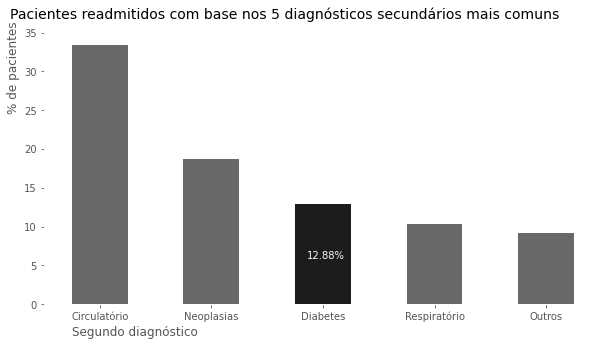

In [45]:
labels = ['Circulatório', 'Neoplasias', 'Diabetes', 'Respiratório', 'Outros']
ticks = [0, 1, 2, 3, 4]

plt.rcParams['figure.figsize'] = [10, 5]

diagnosis = (just_readmitted['categories_diag_2'].value_counts(normalize=True)*100).sort_values(ascending=False)
diagnosis.head(5).plot.bar(rot=0, color=['#696969', '#696969', '#1C1C1C', '#696969', '#696969'])

plt.title('Pacientes readmitidos com base nos 5 diagnósticos secundários mais comuns', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('% de pacientes', horizontalalignment='left', y=0.70)
plt.xlabel('Segundo diagnóstico', horizontalalignment='right', x=0.275)
plt.xticks(ticks, labels)
plt.ylim(0, 35)

plt.annotate(str(round(just_readmitted['categories_diag_2'].value_counts(normalize=True)[4]*100, 2))+'%',
             (1.9, 0),
             textcoords='offset points',
             xytext=(-5, 46),            
             color='#FFFAF0')
plt.show()

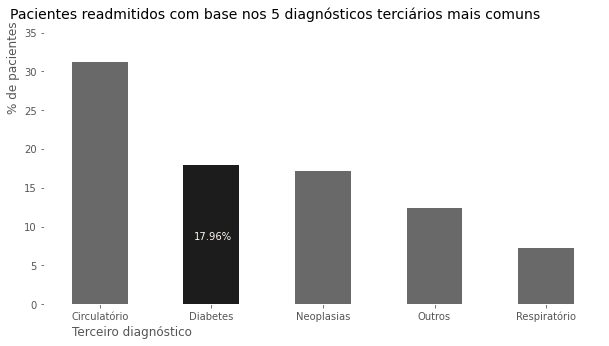

In [46]:
labels = ['Circulatório', 'Diabetes', 'Neoplasias', 'Outros', 'Respiratório']
ticks = [0, 1, 2, 3, 4]

plt.rcParams['figure.figsize'] = [10, 5]

diagnosis = (just_readmitted['categories_diag_3'].value_counts(normalize=True)*100).sort_values(ascending=False)
diagnosis.head(5).plot.bar(rot=0, color=['#696969', '#1C1C1C', '#696969', '#696969', '#696969'])

plt.title('Pacientes readmitidos com base nos 5 diagnósticos terciários mais comuns', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('% de pacientes', horizontalalignment='left', y=0.70)
plt.xlabel('Terceiro diagnóstico', horizontalalignment='right', x=0.265)
plt.xticks(ticks, labels)
plt.ylim(0, 35)

plt.annotate(str(round(just_readmitted['categories_diag_3'].value_counts(normalize=True)[4]*100, 2))+'%',
             (0.9, 0),
             textcoords='offset points',
             xytext=(-6, 65),            
             color='#FFFAF0')
plt.show()

Com base na análise do primeiro gráfico, percebe-se que pacientes diagnosticado com **Diabetes** já no primeiro encontro, são os que tiveram a menor taxa de readmissão, de **8,55%**.

#### Gráfico 3.7: Uso de medicamentos para Diabetes vs. readmitidos

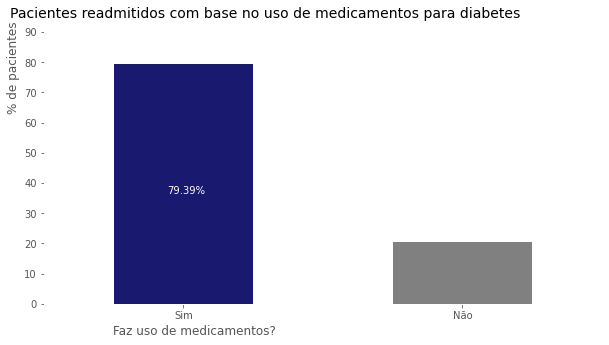

In [47]:
labels = ['Sim', 'Não']
ticks = [0, 1]

plt.rcParams['figure.figsize'] = [10, 5]

(just_readmitted['diabetesMed'].value_counts(normalize=True)*100).plot.bar(rot=0, color=['#191970','#808080'])

plt.title('Pacientes readmitidos com base no uso de medicamentos para diabetes', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('% de pacientes', horizontalalignment='left', y=0.70)
plt.xlabel('Faz uso de medicamentos?', horizontalalignment='right', x=0.415)
plt.xticks(ticks, labels)
plt.ylim(0, 90)

plt.annotate(str(round(just_readmitted['diabetesMed'].value_counts(normalize=True)[1]*100, 2))+'%',
             (-0.1, 10),
             textcoords='offset points',
             xytext=(12, 80),            
             color='#FFFAF0')
plt.show()

A maioria dos pacientes readmitidos faz tratamento contra diabetes.

#### Gráfico 3.8: Número total de medicamentos usados vs. readmitidos

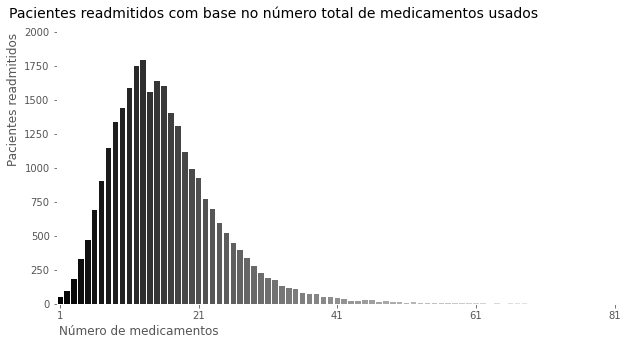

In [48]:
labels = np.arange(1, 100, 20)
ticks = [0, 20, 40, 60, 80]

plt.rcParams['figure.figsize'] = [10, 5]

sns.countplot(just_readmitted['num_medications'], palette=sns.color_palette('Greys_r', n_colors=85))

plt.title('Pacientes readmitidos com base no número total de medicamentos usados', y=1.03, size=14, loc='left', x=-0.085)
plt.ylabel('Pacientes readmitidos', horizontalalignment='left', y=0.51)
plt.xlabel('Número de medicamentos', horizontalalignment='right', x=0.29)
plt.xticks(ticks, labels)
plt.ylim(0, 2000)
plt.show()

De acordo com a nossa base, temos pacientes que tomam desde 1 a até 81 tipos de medicamento. Como demonstrado na figura, a maioria dos pacientes readmitidos tomam entre 6 a 21 medicamentos.

#### Gráficos 3.9: Uso dos medicamentos metformina e insulina vs. readmitidos

Dois dos principais medicamentos usados para o tratamento da diabetes.

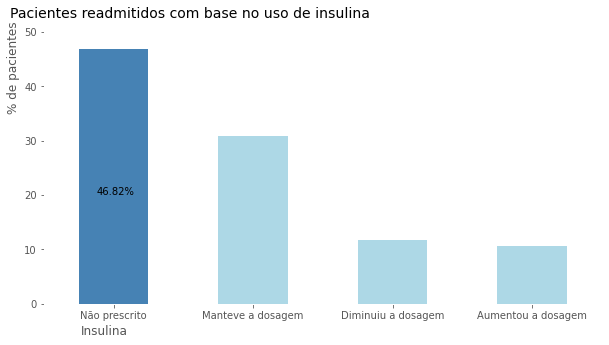

In [49]:
labels = ['Não prescrito', 'Manteve a dosagem', 'Diminuiu a dosagem', 'Aumentou a dosagem']
ticks = [0, 1, 2, 3]

plt.rcParams['figure.figsize'] = [10, 5]

(just_readmitted['insulin'].value_counts(normalize=True)*100).plot.bar(rot=0, color=['#4682B4', '#ADD8E6', '#ADD8E6', '#ADD8E6'])

plt.title('Pacientes readmitidos com base no uso de insulina', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('% de pacientes', horizontalalignment='left', y=0.70)
plt.xlabel('Insulina', horizontalalignment='right', x=0.15)
plt.xticks(ticks, labels)
plt.ylim(0, 50)

plt.annotate(str(round(just_readmitted['insulin'].value_counts(normalize=True)[0]*100, 2))+'%',
             (-0.1, 10),
             textcoords='offset points',
             xytext=(-3, 55),            
             color='#000000')
plt.show()

Temos que **46,82%** dos pacientes readmitidos não fazem uso de Insulina.

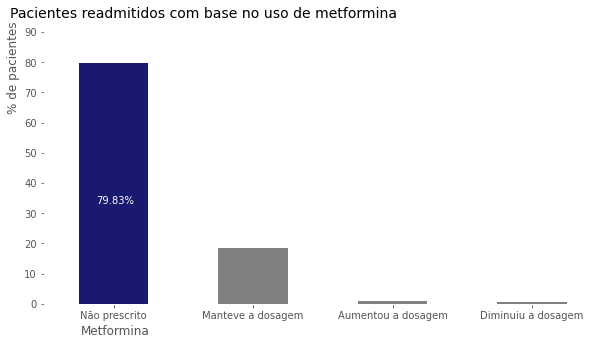

In [50]:
labels = ['Não prescrito', 'Manteve a dosagem', 'Aumentou a dosagem', 'Diminuiu a dosagem']
ticks = [0, 1, 2, 3]

plt.rcParams['figure.figsize'] = [10, 5]

(just_readmitted['metformin'].value_counts(normalize=True)*100).plot.bar(rot=0, color=['#191970','#808080', '#808080', '#808080'])

plt.title('Pacientes readmitidos com base no uso de metformina', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('% de pacientes', horizontalalignment='left', y=0.70)
plt.xlabel('Metformina', horizontalalignment='right', x=0.19)
plt.xticks(ticks, labels)
plt.ylim(0, 90)

plt.annotate(str(round(just_readmitted['metformin'].value_counts(normalize=True)[0]*100, 2))+'%',
             (-0.1, 10),
             textcoords='offset points',
             xytext=(-3, 70),            
             color='#FFFAF0')
plt.show()

Observa-se que dos pacientes readmitidos, **79.83%** não fazem uso da Metformina.

#### Gráfico 4.0: Mudanças no medicamento vs. readmitidos

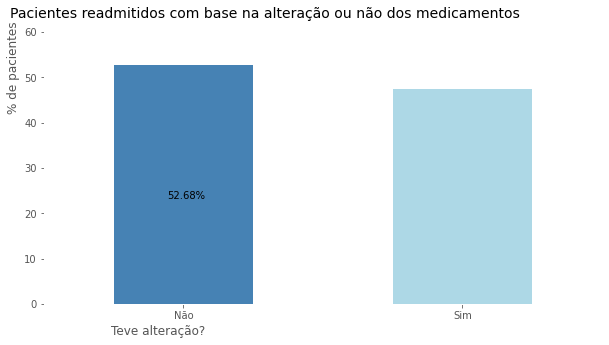

In [51]:
labels = ['Não', 'Sim']
ticks = [0, 1]

plt.rcParams['figure.figsize'] = [10, 5]

(just_readmitted['change'].value_counts(normalize=True)*100).plot.bar(rot=0, color=['#4682B4', '#ADD8E6'])

plt.title('Pacientes readmitidos com base na alteração ou não dos medicamentos', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('% de pacientes', horizontalalignment='left', y=0.70)
plt.xlabel('Teve alteração?', horizontalalignment='right', x=0.29)
plt.xticks(ticks, labels)
plt.ylim(0, 60)

plt.annotate(str(round(just_readmitted['change'].value_counts(normalize=True)[0]*100, 2))+'%',
             (-0.1, 10),
             textcoords='offset points',
             xytext=(12, 60),            
             color='#000000')
plt.show()

Temos **52,68** de casos de readmissão para pacientes sem alteração na medicação. Parece bem equilibrado, o que pode ser um indicativo de que essa variável não seja um fator importante para as readmissões.

#### Correlação dos recursos

In [52]:
cols = [
        'metformin', 
        'repaglinide', 
        'nateglinide', 
        'chlorpropamide', 
        'glimepiride', 
        'acetohexamide', 
        'glipizide', 
        'glyburide', 
        'tolbutamide', 
        'pioglitazone', 
        'rosiglitazone', 
        'acarbose', 
        'miglitol', 
        'troglitazone', 
        'tolazamide', 
        'insulin',
        'glyburide-metformin', 
        'glipizide-metformin', 
        'metformin-rosiglitazone', 
        'metformin-pioglitazone',
        'use_hospital_services', 
        'total_changes'
]

corr = data_cleaned.drop(cols, axis=1).corr()

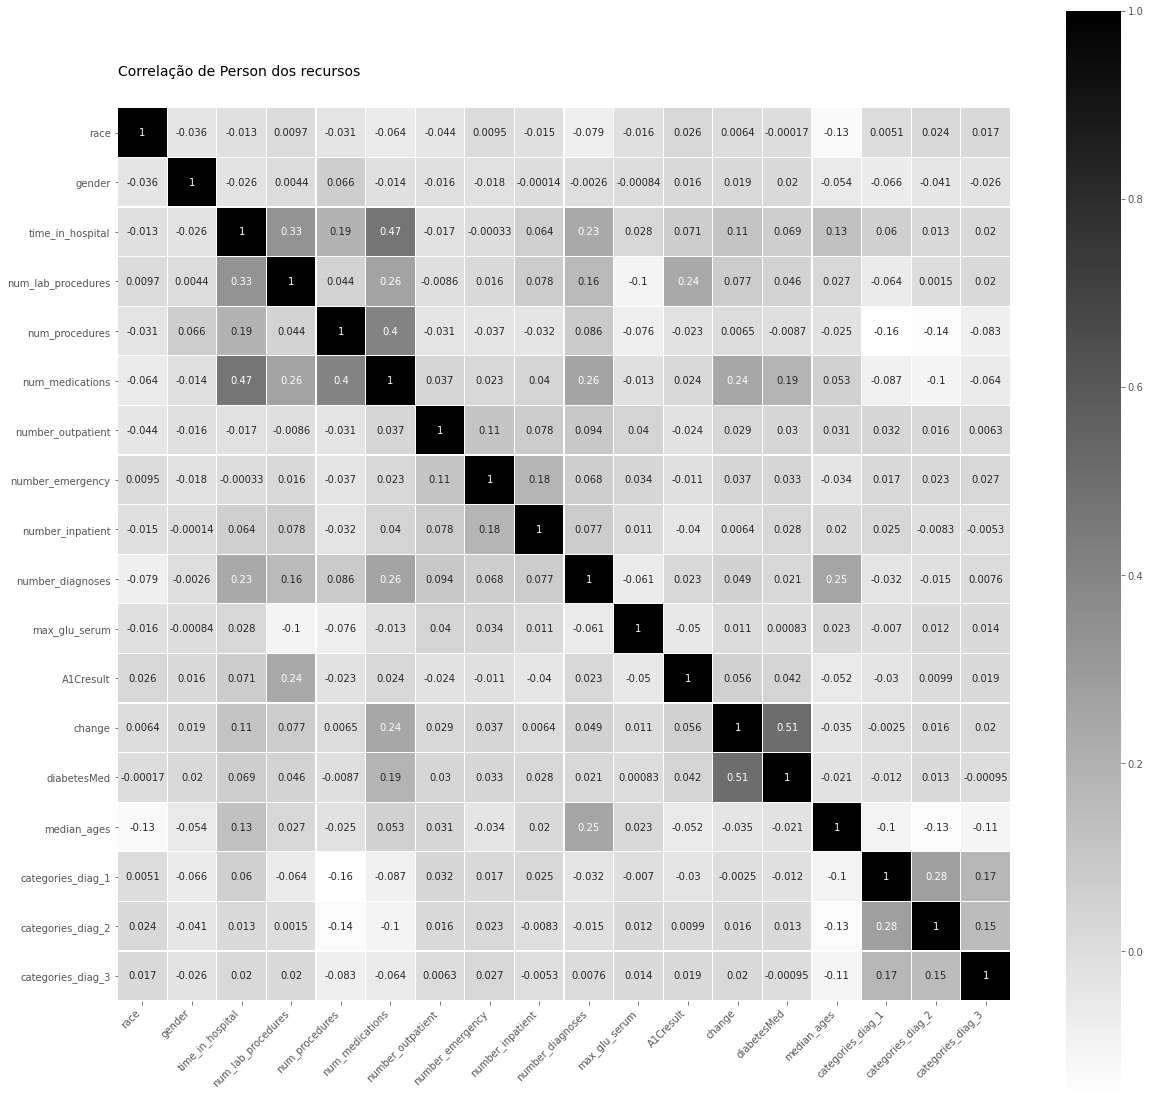

In [53]:
plt.figure(figsize=(20, 20))
plt.title('Correlação de Person dos recursos', y=1.03, size=14, loc='left', x=0.001)
sns.heatmap(corr, linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.gist_yarg, linecolor='white', annot=True)
plt.xticks(rotation=45, ha='right')
plt.show()

Observa-se que nesse grupo de recursos não existe uma dependência forte entre as variáveis, principalmente em relação à variável alvo. Os maiores coeficientes são entre as variáveis **change** e **diabetesMed** e **time_in_hospital** e **num_medications**.

#### Analisando as correlações

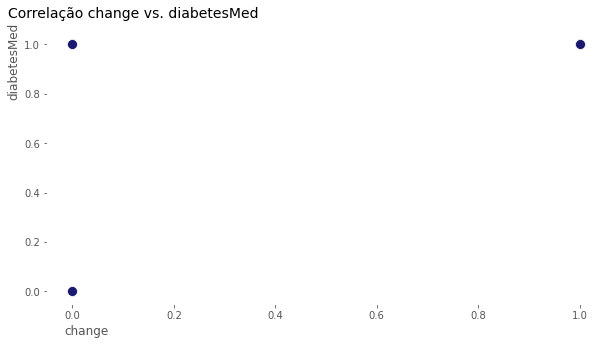

In [54]:
plt.rcParams['figure.figsize'] = [10, 5]

ordered = data_cleaned[['change', 'diabetesMed']].sort_values(by=['change', 'diabetesMed'])
sns.scatterplot(x='change', y='diabetesMed', data=ordered, color='#191970', s=100)

plt.title('Correlação change vs. diabetesMed', y=1.03, size=14, loc='left', x=-0.07)
plt.ylabel('diabetesMed', horizontalalignment='left', y=0.75)
plt.xlabel('change', horizontalalignment='right', x=0.11)
plt.show()

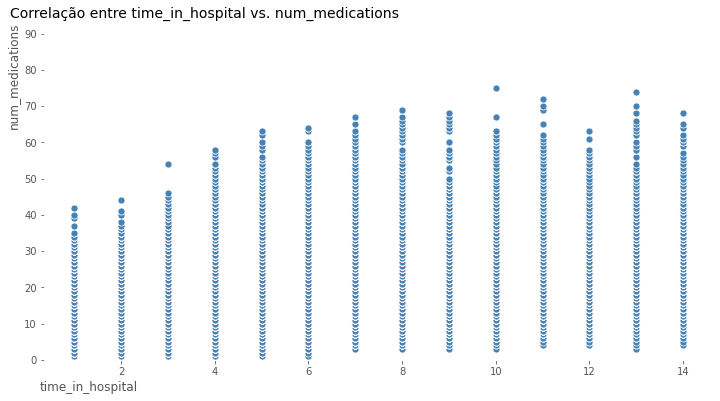

In [55]:
plt.rcParams['figure.figsize'] = [12, 6]

ordered = data_cleaned[['time_in_hospital', 'num_medications']].sort_values(by=['time_in_hospital', 'num_medications'])
sns.scatterplot(x='time_in_hospital', y='num_medications', data=ordered, color='#4682B4', s=50)

plt.title('Correlação entre time_in_hospital vs. num_medications', y=1.03, size=14, loc='left', x=-0.05)
plt.ylabel('num_medications', horizontalalignment='left', y=0.71)
plt.xlabel('time_in_hospital', horizontalalignment='right', x=0.14)
plt.ylim(0, 90)
plt.show()

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

***---> Comente brevemente sua decisão aqui.***

**`Problema:`** Classificação

**`Variável alvo:`** readmitted

A finalidade dessa modelagem será prevê se um paciente portador de diabetes será readmitido em algum hospital após iniciado o tratamento.

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


#### Amostragem extratificada para nivelar as classes

In [56]:
sample = data_cleaned.groupby(['is_readmitted']).apply(lambda x : x.sample(n=27995, replace=False))
sample.reset_index(drop=True, inplace=True)
print(sample['is_readmitted'].value_counts())

Não    27995
Sim    27995
Name: is_readmitted, dtype: int64


#### Eliminando colunas que não serão usadas no modelo

In [57]:
cols = ['age', 'diag_1', 'diag_2', 'diag_3', 'readmitted', 'change', 'number_inpatient', 'number_emergency', 'number_outpatient']
sample.drop(cols, axis=1, inplace=True)

#### Separação da Target

In [58]:
X, y = sample.drop(['is_readmitted'], axis=1).values, sample['is_readmitted'].values

#### Encoder

0: Não readmitido | 1: Readmitido

In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

#### Padronização e seleção de features

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFwe, f_classif

pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('select', SelectFwe(score_func=f_classif, alpha=0.05))
])

X = pipe.fit_transform(X, y)
print(f'Linhas: {X.shape[0]} | Colunas: {X.shape[1]}')

Linhas: 55990 | Colunas: 21


3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


***---> Comente brevemente sua decisão aqui.***

**`Métrica:`** Área sob curva (AUC)

Essa métrica foi escolhida por ser umas das mais indicadas para problemas de classificação binária e pelo fato de não haver desequilíbrio entre as classes. Outro fator, seria que ambas as classes possuem o mesmo grau de interesse.

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


#### Divisão dos dados

In [61]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


### Baseline

In [62]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, roc_curve

In [63]:
%%time

ML_models = {}
model_summary = []
model_index = ['LR', 'XGBC', 'Tree', 'SVC', 'MLP', 'SGD']

model_sklearn = [
    LogisticRegression(),
    XGBClassifier(),
    DecisionTreeClassifier(), 
    SVC(probability=True), 
    MLPClassifier(),
    SGDClassifier(loss='modified_huber')
]

for name, model in zip(model_index, model_sklearn):
    ML_models[name] = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_summary.append([name, 
                          f1_score(y_test, y_pred, average='weighted'), 
                          accuracy_score(y_test, y_pred), 
                          roc_auc_score(y_test, model.predict_proba(X_test)[:,1])])

CPU times: user 25min 36s, sys: 4min 36s, total: 30min 13s
Wall time: 21min 21s


#### Comparação entre os baselines

In [64]:
models_metrics = pd.DataFrame(model_summary, columns=['Name', 'F1_score', 'Accuracy', 'AUC_ROC'])
models_metrics.reset_index(inplace=True, drop=True)
models_metrics.sort_values(by=['AUC_ROC'], ascending=False)

,Name,F1_score,Accuracy,AUC_ROC
3,SVC,0.590057,0.590105,0.626692
1,XGBC,0.590616,0.590641,0.625222
0,LR,0.579563,0.580014,0.617580
4,MLP,0.575624,0.575728,0.607803
5,SGD,0.542022,0.544562,0.565235
2,Tree,0.536786,0.536792,0.536799


#### Definição do modelo

In [112]:
model = XGBClassifier(objective= 'binary:logistic', nthread=4)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
auc = round(roc_auc_score(y_test, y_pred), 2)
print(f'AUC: {auc}')

AUC: 0.63


#### Hiperparâmetros

In [108]:
from sklearn.model_selection import RandomizedSearchCV

parameters =    {
            'max_depth': [3, 4, 5],
            'learning_rate': [0.1, 0.2, 0.3, 5],
            'n_estimators': [150, 200, 300, 500],
            'gamma': [0, 0.1, 0.2],
            'min_child_weight': [0.5, 1, 6],
            'max_delta_step': [0],
            'subsample': [0.7, 0.8, 0.9, 1],
            'colsample_bytree': [0.6, 0.8, 1],
            'colsample_bylevel': [1],
            'reg_alpha': [0, 1e-2, 1, 1e1],
            'reg_lambda': [0, 1e-2, 1, 1e1],
            'base_score': [0.5]
            }


clf = RandomizedSearchCV(
    XGBClassifier(objective='binary:logistic', nthread=4), 
    parameters, 
    n_jobs=2, 
    cv=5, 
    scoring='roc_auc', 
    verbose=2, 
    refit=True
)

search = clf.fit(X, y)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  1.6min finished


{'subsample': 0.7,
 'reg_lambda': 10.0,
 'reg_alpha': 0.01,
 'n_estimators': 150,
 'min_child_weight': 1,
 'max_depth': 5,
 'max_delta_step': 0,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 1,
 'base_score': 0.5}

#### Modelo com parâmetros ajustados

In [119]:
model = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    subsample=.7,
    reg_lambda=0.0,
    reg_alpha=.01,
    n_estimators=150,
    min_child_weight=1,
    max_depth=5,
    max_delta_step=0,
    learning_rate=0.1,
    gamma=0,
    colsample_bytree=0.8,
    colsample_bylevel=1,
    base_score=0.5
)

model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
auc = round(roc_auc_score(y_test, y_pred), 2)
print(f'AUC: {auc}')

AUC: 0.64


#### Validação cruzada

In [114]:
scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', verbose=0, n_jobs=2)
print('AUC: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

AUC: 0.64 (+/- 0.01)


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

#### AUC

In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]

fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr, tpr, label='Baseline (XGB), auc='+str(auc), color='black')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--')

plt.legend(loc=4)
plt.title('AUC', y=1.03, size=14, loc='left', x=-0.055)
plt.ylabel('True Positive Rate', horizontalalignment='left', y=0.63)
plt.xlabel('False Positive rate', horizontalalignment='right', x=0.195)
plt.show()

#### Matriz de confusão

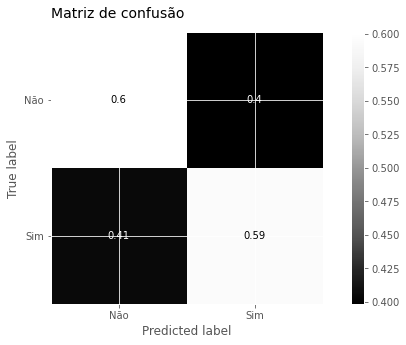

In [116]:
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

plt.rcParams['figure.figsize'] = [10, 5]

disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=encoder.classes_.tolist(),
                                 cmap=plt.cm.Greys_r,
                                 normalize='true'
                            )
disp.ax_.set_title('Matriz de confusão', y=1.03, size=14, loc='left', x=-0.0009)
plt.show()

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*

<p style='text-align: justify;'>Esse projeto partiu de três hipóteses iniciais, a primeira hipótese não foi conclusiva com base apenas nas informações disponíveis. Já as segunda e terceira puderam ser confirmadas de acordo com as investigações.</p> 
    
<p style='text-align: justify;'>As análises nos mostrou que não se pode determinar que a etnia e idade sejam fatores realmente relevantes. Conforme demonstra os gráficos 3.1 e 3.2, pacientes caucasianos e na faixa de idade entre 70-80 anos possuem maior taxa de readmissão, porém não acredito ser possível determinar se eles são maioria por serem mais sucetíveis à readmissão ou se é apenas o desequilibrio do conjunto de dados.</p>
    
<p style='text-align: justify;'>Foi possível perceber também, como vistos nos gráficos 3.5 e 3.6, que tanto pacientes que realizam o teste HbA1c já na primeira consulta, quanto àqueles que têm diabetes como primeiro diagnóstico, possuem menos chances de serem readmitidos. Acredito que essa redução se deva ao fato da (1) hemoglobina glicada ser uma medida importante do controle da glicose e amplamente aplicada para medir o desempenho do tratamento do diabetes e (2) de que quanto mais cedo se iniciar o tratamento adequado, mas efetivo será o controle da doença.</p>